<a href="https://colab.research.google.com/github/javlonravshanov/Titanic_survival_prediction_model/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

## Introduction
This project involves predicting the survival of passengers on the Titanic using machine learning. The dataset used is the Titanic dataset from [Kaggle](https://www.kaggle.com/competitions/titanic/data). The goal is to build a Random Forest Classifier to predict whether a passenger survived based on features such as age, sex, and passenger class.


# Data preparation


In [ ]:
# importing necessary libraries
from fastai.tabular.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# downloading the dataset

import gdown

file_id = '1_cXMFp9AP33efKNssvQ4dhkltFKSf9tA'
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="dataset.zip", quiet=False)

!unzip /content/dataset.zip -d /content/dataset

## Loading and exploring the dataset

In [ ]:
df = pd.read_csv('/content/dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Dataset Overview:**  
The dataset contains the following features:
- `Pclass`: Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
- `Sex`: Gender (male, female)
- `Age`: Age of the passenger
- `Fare`: Ticket Fare
- `Survived`: Survival (0 = No, 1 = Yes)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##Data Preprocessing


In [ ]:
# handling missing values
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


# Data visualization

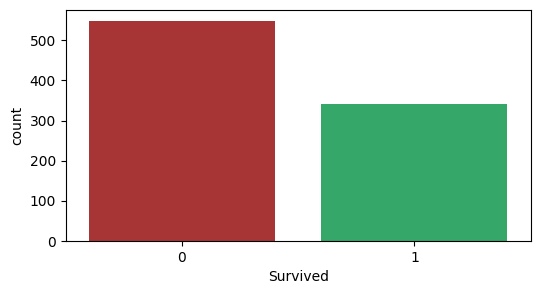

In [ ]:
# count plot for 'Survived' column
custom_colors = ['#ba2222', '#22ba66']
plt.figure(figsize=(6, 3))
sns.countplot(x='Survived', hue='Survived', data=df, palette=custom_colors, legend=False)
plt.show()

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


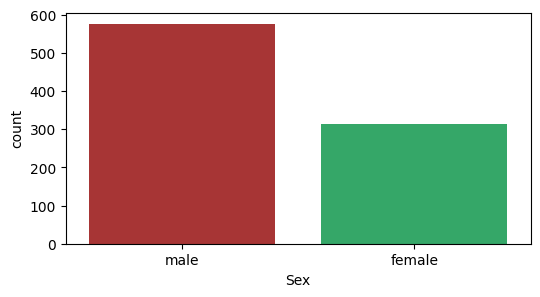

In [ ]:
# count plot for 'Sex' column
custom_colors = ['#ba2222', '#22ba66']
plt.figure(figsize=(6, 3))
sns.countplot(x='Sex', hue='Sex', data=df, palette=custom_colors, legend=False)
plt.show()

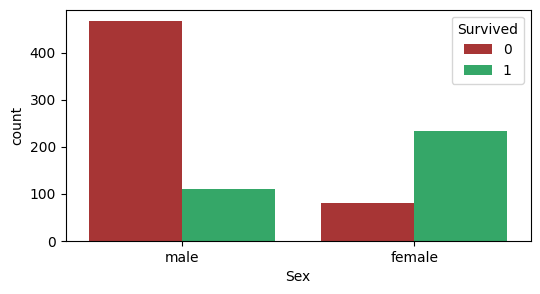

In [ ]:
# Survivor gender wise
custom_colors = ['#ba2222', '#22ba66']
plt.figure(figsize=(6, 3))
sns.countplot(x='Sex', hue='Survived', data=df, palette=custom_colors)
plt.show()

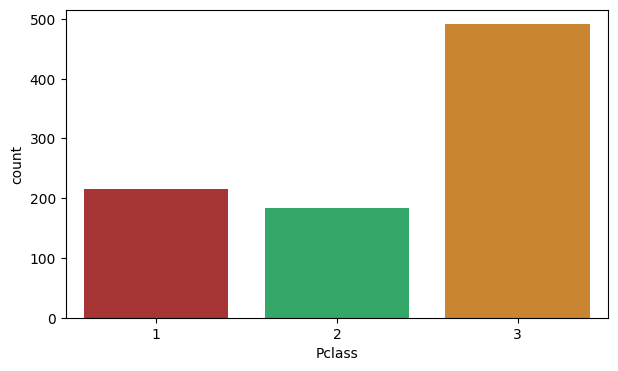

In [ ]:
# Pclass visuals
custom_colors = ['#ba2222', '#22ba66', '#e38717']
plt.figure(figsize=(7, 4))
sns.countplot(x='Pclass', hue='Pclass',  data=df, palette=custom_colors, legend=False)
plt.show()

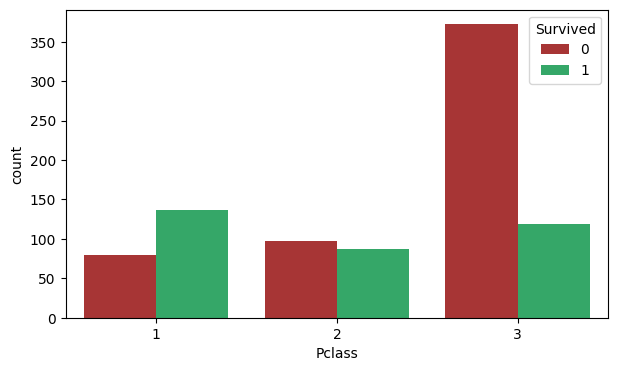

In [ ]:
# Survivors wise Pclass visuals
custom_colors = ['#ba2222', '#22ba66']
plt.figure(figsize=(7, 4))
sns.countplot(x='Pclass', hue='Survived',  data=df, palette=custom_colors)
plt.show()

**Insights from data visualization:**  
From the EDA, we observe:
- Women had a significantly higher survival rate than men.
- Passengers in higher classes (1st) were more likely to survive than those in lower classes (3rd).


**Data Preprocessing:**  
- Missing values in the `Age` column were filled with the median age.
- Categorical features such as `Sex` were encoded as numeric values for model compatibility.


In [ ]:
# converting cat variables into cont
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,596,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,2


In [ ]:
# Define features and target variable
X = df.drop(columns=['Name', 'Survived'], axis=1)
Y = df['Survived']

In [ ]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,1,22.000000,1,0,523,7.2500,2
1,2,1,0,38.000000,1,0,596,71.2833,0
2,3,3,0,26.000000,0,0,669,7.9250,2
3,4,1,0,35.000000,1,0,49,53.1000,2
4,5,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,101,13.0000,2
887,888,1,0,19.000000,0,0,14,30.0000,2
888,889,3,0,29.699118,1,2,675,23.4500,2
889,890,1,1,26.000000,0,0,8,30.0000,0


In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Splitting the dataset into train & test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 9) (712, 9) (179, 9)


**Model Training and Optimization:**

1. **Decision Tree (Initial Model):**
   - First, I trained a basic **Decision Tree Classifier** using default parameters to establish a baseline model. It performed reasonably well but had limitations such as overfitting on the training data.

2. **Grid Search for Decision Tree Optimization:**
   - To improve the Decision Tree, I performed a **Grid Search** for hyperparameter tuning. By searching over different values for `max_depth`, `min_samples_split`, and `min_samples_leaf`, I found the optimal configuration to balance the model's performance between training and validation data.

3. **Random Forest (Advanced Model):**
   - Next, I trained a **Random Forest Classifier** for better accuracy and robustness. Random Forest aggregates multiple decision trees, reducing overfitting and increasing predictive performance.

4. **Grid Search for Random Forest Optimization:**
   - Similar to the Decision Tree, I performed a **Grid Search** on the Random Forest model to optimize parameters such as `n_estimators`, `max_depth`, and `min_samples_split`. This resulted in significant improvement over the initial model.

5. **Feature Importance:**
   - After training the Random Forest, I used its **Feature Importance** capabilities to identify the most significant features impacting the survival prediction. I retrained the model using only the most relevant features, further enhancing performance.

**Final Model:**  
The final model, a Random Forest with optimized parameters and the most important features selected, provided the best accuracy and generalization ability.


# Decision tree model

In [ ]:
m = DecisionTreeClassifier()

In [ ]:
m.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
X_train_pred = m.predict(X_train)
print(X_train_pred)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 

In [ ]:
# accuracy of X_train
train_accuracy = accuracy_score(Y_train, X_train_pred)
print('Accuracy score of training data : ', train_accuracy)

Accuracy score of training data :  1.0


In [ ]:
X_test_pred = m.predict(X_test)
print(X_test_pred)

[0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [ ]:
# accuracy of X_test
test_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy score of training data : ', test_accuracy)

Accuracy score of training data :  0.770949720670391


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters
param_grid = {
    'max_leaf_nodes': [50, 80, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'max_leaf_nodes': 80, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score: 0.8076824583866837


In [ ]:
grid_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=80, min_samples_leaf=2, min_samples_split=4)
grid_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=80, min_samples_leaf=2,
                       min_samples_split=4)

In [ ]:
X_train_pred_grid = grid_model.predict(X_train)
X_test_pred_grid = grid_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, X_train_pred_grid)
test_accuracy = accuracy_score(Y_test, X_test_pred_grid)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.9171348314606742
Test accuracy: 0.8156424581005587


In [ ]:
# Baseline model with default parameters
baseline_model = DecisionTreeClassifier()
baseline_model.fit(X_train, Y_train)
Y_test_pred_baseline = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(Y_test, Y_test_pred_baseline)
print('Baseline Test Accuracy:', baseline_accuracy)

Baseline Test Accuracy: 0.7541899441340782


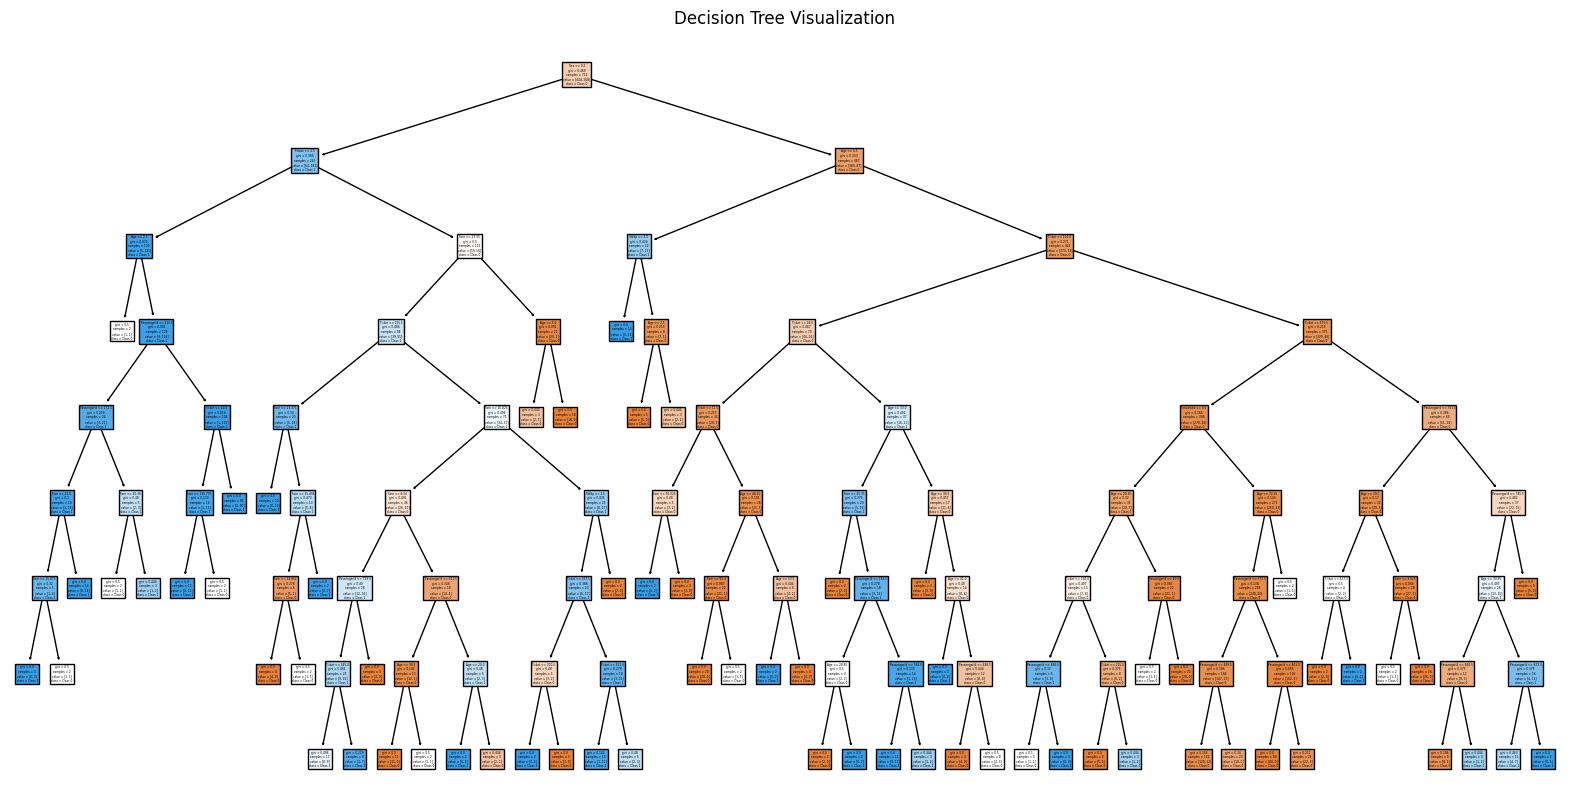

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(grid_model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))

print("Random Forest Train Accuracy:", rf_train_accuracy)
print('Random Forest Test Accuracy:', rf_test_accuracy)

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.8491620111731844


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8314586821629074


In [ ]:
rf_model = RandomForestClassifier(max_depth=10, max_features ='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [ ]:
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))

print("Random Forest Train Accuracy:", rf_train_accuracy)
print('Random Forest Test Accuracy:', rf_test_accuracy)

Random Forest Train Accuracy: 0.9087078651685393
Random Forest Test Accuracy: 0.8212290502793296


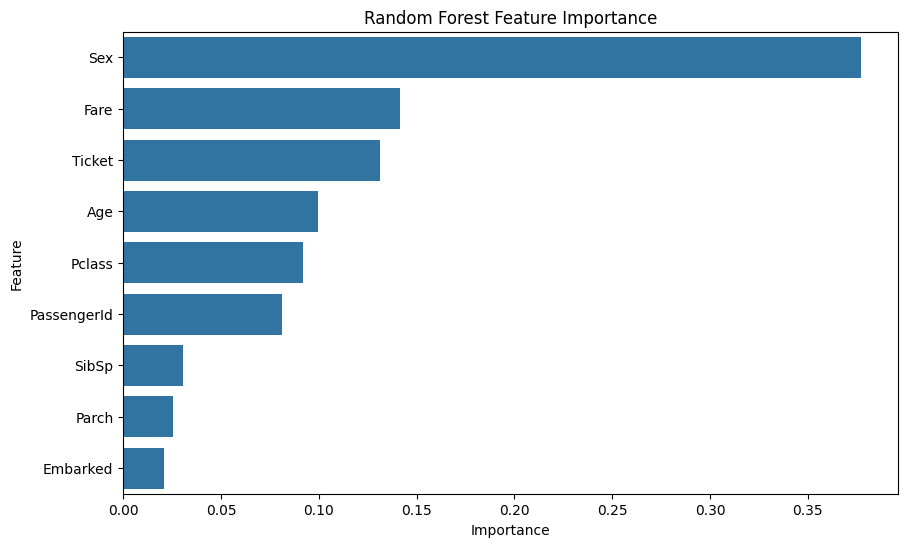

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and plot
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
X_train = X_train.drop(columns=['SibSp', 'Parch', 'Embarked'], axis=1)
X_test = X_test.drop(columns=['SibSp', 'Parch', 'Embarked'], axis=1)

In [ ]:
rf_model = RandomForestClassifier(max_depth=10, max_features ='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [ ]:
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))

print("Random Forest Train Accuracy:", rf_train_accuracy)
print('Random Forest Test Accuracy:', rf_test_accuracy)

Random Forest Train Accuracy: 0.9087078651685393
Random Forest Test Accuracy: 0.8044692737430168


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8328572835615088


In [ ]:
rf_model = RandomForestClassifier(max_depth=None, max_features ='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=100)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5)

# Final results

In [ ]:
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))

print("Random Forest Train Accuracy:", rf_train_accuracy)
print('Random Forest Test Accuracy:', rf_test_accuracy)

Random Forest Train Accuracy: 0.9129213483146067
Random Forest Test Accuracy: 0.8156424581005587


In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']